In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import accuracy_score

In [69]:
from sklearn.model_selection import train_test_split

## To Download the dataset

https://www.kaggle.com/datasets/uciml/iris/code

## To know more about The Task
https://www.analyticsvidhya.com/blog/2022/06/iris-flowers-classification-using-machine-learning/

In [7]:
df=pd.read_csv("iris.csv")

In [77]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [78]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [28]:
df.shape

(150, 6)

In [34]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [51]:
df.SepalLengthCm.dtype

dtype('float64')

In [52]:
import seaborn as sns

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

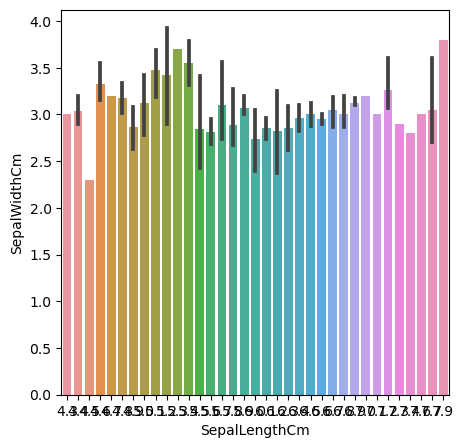

In [61]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='SepalLengthCm',y='SepalWidthCm',data=df)

## Finding the correlation between the different Parameters to devlop the model

In [57]:
correlation=df.corr()

C:\Users\Govind\AppData\Local\Temp\ipykernel_19148\1332955121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

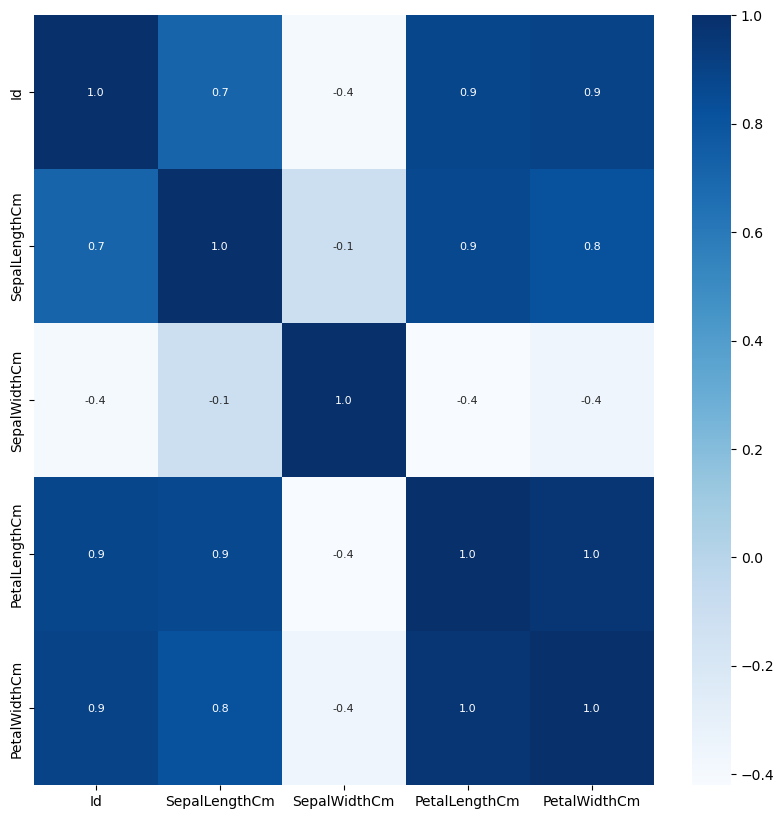

In [58]:
plot=plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')


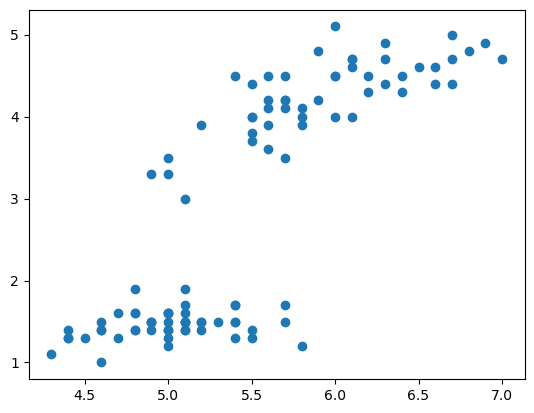

In [33]:
fig, ax = plt.subplots()
ax.scatter(df["SepalLengthCm"][:100], df["PetalLengthCm"][:100])

In [64]:
df.groupby("Species").value_counts()

Species         Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Iris-setosa     1    5.1            3.5           1.4            0.2             1
                2    4.9            3.0           1.4            0.2             1
                20   5.1            3.8           1.5            0.3             1
                22   5.1            3.7           1.5            0.4             1
                23   4.6            3.6           1.0            0.2             1
                                                                                ..
Iris-virginica  127  6.2            2.8           4.8            1.8             1
                128  6.1            3.0           4.9            1.8             1
                129  6.4            2.8           5.6            2.1             1
                130  7.2            3.0           5.8            1.6             1
                150  5.9            3.0           5.1            1.8             1
Length: 1

In [17]:
from sklearn import svm

In [65]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [40]:
X=df.drop(["Species","Id"],axis=1)
y=df["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(y_train)
model=svm.SVC()
model.fit(X_train,y_train)

125     Iris-virginica
75     Iris-versicolor
45         Iris-setosa
44         Iris-setosa
131     Iris-virginica
            ...       
130     Iris-virginica
121     Iris-virginica
16         Iris-setosa
25         Iris-setosa
65     Iris-versicolor
Name: Species, Length: 120, dtype: object


SVC()

In [41]:
model.predict(X_train)

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
 

In [42]:
accuracy_score(model.predict(X_train),y_train)

0.9833333333333333

In [43]:
model.predict(X_test)

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [44]:
accuracy_score(model.predict(X_test),y_test)

0.8333333333333334

In [66]:
model.score(X_test,y_test)

0.8333333333333334

In [68]:
'''from sklearn.metrics import r2_score
r2_score(model.predict(X_test),y_test)'''
# this won't work because y_test is in string format we need to encoding to make it


'from sklearn.metrics import r2_score\nr2_score(model.predict(X_test),y_test)'

## prediction on one sample 1

In [46]:
input_data=(5.1,3.5,1.4,0.2)
# changing the numpy data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape data as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
prediction

C:\Users\Govind\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

## prediction on sample 2

In [50]:
input_data=(5.6,3,4.5,1.5)
#changing the input data into numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the data as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
prediction

C:\Users\Govind\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

## prediction on sample 3

In [60]:
input_data=(5,3,2.5,1.5)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
prediction

C:\Users\Govind\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

In [75]:
from sklearn.metrics import classification_report
y_preds=model.predict(X_test)
list=['Category1','Category2','Category3']
classification_report(y_preds,y_test, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')


'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00         9\nIris-versicolor       0.78      0.70      0.74        10\n Iris-virginica       0.75      0.82      0.78        11\n\n       accuracy                           0.83        30\n      macro avg       0.84      0.84      0.84        30\n   weighted avg       0.83      0.83      0.83        30\n'